In [4]:
from Bio import SeqIO, pairwise2
from Bio.Seq import Seq
from Bio.SeqUtils import GC, MeltingTemp as mt, molecular_weight as mw, nt_search
from collections import Counter
from matplotlib import pyplot as plt
from Levenshtein import distance

In [2]:
record = SeqIO.read('d.fasta', 'fasta')
seqA = record.seq
print("seq A:", seqA)
print("length:", len(seqA))
print("complement:", seqA.complement())
print("transcribe:", seqA.transcribe())
print("translate:", seqA.translate())

seq A: GTTTAGTCTATCGCTGCGGTTGCGAGCGCTGTAGGGAGCCTGTGCTGTGCCGCGCAGTTAGGCAGCAGCAGCCGCGGAGCAGTAGCCGCCGTGGGAGGGAGCCATGAAGCATTACGAGGTGGAGATTCTGGACGCAAAGACAAGGGAGAAGCTGTGTTTCTTGGACAAGAGCTGACGTCCCTGCGCCTGTGCTTCCCCCAGGTGGAGCCCCACGCCACCATTGCGGAGATCAAGAACCTCTTCACTAAGACCCATCCGCAGTGGTACCCCGCCCGCCAGTCCCTCCGCCTGGACCCCAAGGGCAAGTCCCTGAAGGATGAGGATGTTCTGCAGAAGCTGCCCGTGGGCACCACGGCCACACTGTACTTCCGGGACCTGGGGGCCCAGATCAGCTGGGTGACGGTCTTCCTAACAGAGTACGCGGGGCCCCTTTTCATCTACCTGCTCTTCTACTTCCGAGTGCCCTTCATCTATGGCCACAAATATGACTTTACGTCCAGTCGGCATACAGTGGTGCACCTCGCCTGCATCTGTCACTCATTCCACTACATCAAGCGCCTGCTGGAGACGCTCTTCGTGCACCGCTTCTCCCATGGCACTATGCCTTTGCGCAACATCTTCAAGAACTGCACCTACTACTGGGGCTTCGCCGCGTGGATGGCCTATTACATCAATCACCCTCTCTACACTCCCCCTACCTACGGAGCTCAGCAGGTGAAACTGGCGCTCGCCATCTTTGTGATCTGCCAGCTCGGCAACTTCTCCATCCACATGGCCCTGCGGGACCTGCGGCCCGCTGGGTCCAAGACGCGGAAGATCCCATACCCCACCAAGAACCCCTTCACGTGGCTCTTCCTGCTGGTGTCCTGCCCCAACTACACCTACGAGGTGGGGTCCTGGATCGGTTTCGCCATCATGACGCAGTGTCTCCCAGTGGCCCTGTTCTCCCTGGTGGGCTTCACCCAGATGACCATCTGGGCCAAGGGCAAGCAC

c:\ProgramData\anaconda3\envs\CompBio\lib\site-packages\Bio\Seq.py:2338: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


In [3]:
seqPart = seqA[9:20]
print("seq part from 10 to 20:", seqPart)

seq part from 10 to 20: ATCGCTGCGGT


In [5]:
nt_search(str(seqA), 'AGCT')

['AGCT', 149, 169, 334, 390, 704, 748, 996, 1128]

In [8]:
temp = [x for x in seqA if x in 'AGCT']
temp = ''.join(temp)
print("GC:", GC(temp))
print("AT:", 100 - GC(temp))

GC: 60.71733561058924
AT: 39.28266438941076


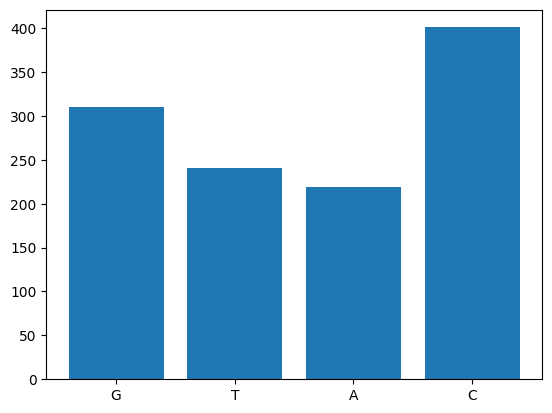

In [10]:
resCounter = Counter(seqA)
plt.bar(resCounter.keys(), resCounter.values())
plt.show()

In [11]:
print("TM_wallace:", mt.Tm_Wallace(seqA))
print("TM_GC:", mt.Tm_GC(seqA))
print("TM_NN:", mt.Tm_NN(seqA))

TM_wallace: 3764.0
TM_GC: 84.03661728676444
TM_NN: 87.50052168545636


In [12]:
print("molecular weight:", mw(seqA))

molecular weight: 359936.5308000014


In [13]:
seqB = "AGCTGATCGTACGTAGGACGTAGTCGATATCTACATGAGCGCGGCGCATATATATATGCGATCGTAGCTGACGATCATCATCGTAGCTAGTCGATGCTAGCTGATCGCCCCCGGGGGGGGATATATTATATAGGTATAAAAAATGTGTGTTGGTTTTTTTTTTTTTTTTCAGTCGTAGCTGATCGATGCGATGCTAGTCGTAGCTGATCGATCGTAGCTGATCGTAACGACGTCCAGAGTTTTTTCTTTAGCAAACAGATTTATTACAAACGGTGAAAAATGCAGAGGCAACTTAAAGCCCATTCCAGTAAAAAACATTCAGGCTTTGGAGAATCGGAGAAAGTCCACCTGGATGTCAACCTGAAGAAACATTTGGAAAACTTGGAGTCAGTTTTCAGCTTTTTAAGCCCTTTATTTTTTGCCTCTTATTTGTATGTTTCTTTTCTCAACGAAAAATGTTTTAATTTTAGCACAATCAACGTAAACCTGACGGTCTAATTTCATCTGAGTGATAGCTAGAATTAGTGTGCCATTGGTTGTTTGTTTTCATTTTGTAGATTTACTACATTGAGTGTGCGAATGTGTCATGAATTTCGTTTAAAGTTTGCATATTCCAGTAGCAAATTAAATGTTTATAAAAAATAAGTTTTGTTTTGGATCTGAAGTGCATGATATTGCATATTGTTAATGAACTTACAGACTTCTTCTTGTGGCGTAGCGATCGTAGCTGATGCTGATCGATGCTAGTCGATGCGATCGTAGCTGATGCTAGCTGATCGTAGCTAGCTAGCTAGTCGTGTGCTGTCGTGTGTGATCATCGATGCTAGCGATCGAGCTAGCTGATCGAGCTAGTCGATCGTAGCTAGTCGATGCTAGCTGATCGTAGCTGATCGTATATTTATATATATGCGCTACTAGCTTGACGATCATGCTAGTGTGTGTCGTAGCTGATGCGCGCGCGTATATATATAATTTTTTTTAAAGTCGATGCCCCCCCCGGGGGAGATGTCAGCTGATCGATGCTAGGATATGCTGATCGTAGCTGACGATGCTGATGCTAGGGCGCCCGGGATTATATATTTTTAAAGGCTACGTACGGGCGCGCGGGGCGAGCTGAGGGGCGCGCGGTATATATTATAGCTGTAGCTAGCTGAGCTAGCTGGGGATAAAAAATTTTTTATGCTAGCTGATCGATGCATCGCGAGA"
localAlignms = pairwise2.align.localms(seqA, seqB, 4, -1, -2, -1)
print(pairwise2.format_alignment(*localAlignms[0]))

5 AGTCT-ATCGCTGCGGTTGCGAGCGCT-GTAGGGAGC--C-TGTGCTGTGCCGCGCA---GT-TAGGC-AGCAGCAGCCG-CG--GAGCA--GTAGCCGCCGTGGGAGGG-AGCCATGAA-GCATTACGAGGTGG---AGATTCTGGACGCA-AAGACAAGG-GAGAAG---CTGTGTTTCTTGGACA--AG-AGCTGA-CG-TCCC-TGC--GCCTGT-GCT--TC--CCCCAGGTGGAGC---CCCACG-CCACCA----TTGCGG-AGATCAAGA-ACCTCT-TCACTAA----GACCCATCCGCAGTGGTACC---CCGCCCGCCAGTCCCTCC-GCCTGGACCCCAAGGGCAAGTCCCTGAAGGATGAGGATGT-TCTGCAGAA-GCTGCC-CGTGG--G-CA-CC--ACGGCCACACTGTACTTCCGGGAC-CTGGGGGCCCAGATCAGCTGGGTGACGGTCTTCCTAA-CAGAGTACGCGGGGCCCCTT-TTCATCTACCTGCTCTTCTACT-TC--CG---AGTGCCCTTCATCTATGGC-CA--CAAA-TA----TGAC--TTTACGTCCAGTC-G-GC-ATA-C-AG---T-G-GTGCACCTCGCCTGCATCTG---TCACT-----CATTCCACTACATCAAGCGCCTGCTGGAGACGCTCTTCGTGCA--CCGCTTCTCCCA--TGGCACTATGCCTTT-GCGCA--ACATCTT--CAAGAACTGCACCTAC-TACTGGGGCTTC-GCCGCGTGG-ATGGCCTA---TTACATCAA--T-CACCCTCTCTACACTCCCCC-TACCTA-CGGAGCTCA-GCAGGT-GAAACTGG-CGCTCGCCATCTTTG-TGAT-CT-GCCAGCTCG--GCAA-CTT-CTCCA-TCCACATG-GCCCTG-CG---G-GACC-TGCG--GCCCGCTGGGTCCAAGACGCG-GAAGATC--CCATACCCCACCAAGAACCCCT--TC-ACG-TGGCTC

In [14]:
def hamming(seq1, seq2):
    return len([(x,y) for x, y in zip(seq1, seq2) if x != y])

seqC = "CGTAGCTAGCGACTAGTCGACAGCGATCGATGATATGCATGATGATGTATATAATGTGCAGTCGATGCTGATGCATTCTGGCGTCTGACGCTAGCTAGGCTAGCTAGCAGCTAGCTGATCGATGCGATGCTAGTACTGAGTCGACGATGCTAGCTA"
print("hamming:", hamming(seqA, seqC))

hamming: 129


In [15]:
seqD = "TAGAGGCAATGTTATATGAGAATCCTCCAAATGTCCTCCGACATAAATAGCCGGCTCCACCTGTTTGCCTGCACCTGACGTAGCGCCAACTGTCCTCTACCATGGGGGGGCTGCATATCGCACAGCTGTGCGGGTAGAAACTCACATTCCATGGCGATTAGTCGCCGGTGCAGCACATGGGAGCTAATTCGGCATGTGCCCCCAAGCGGGCAGGATAAGGACGCAAGCAATAATGATTGAATGCATAGGACGATGCACACTCGGATGAAGTCTGTCACCTTGGTGCGTTGTATACTCACTCTTTGCCGTGCCGGCAAAATCGGTAAAGGAAGAAGGGTGGTAGCGTCGTTGGGAGGCTCGAAAGCATAAAGTATAGATGCCCTGTAGCACCGTATGCTAGACAGGTTCTAGAGCCCTACCTGTATGAAACCCTTGAACCGCTATCGAGCACGTGTCAAACCCCACCAGATCGTGGAATCCCGCGAGGCGTCATCTATGTACTGTGCTATATCCCCCTTGGCGACCCAGTGATGCCAGGGGCTTGCGTCAAACCAAGTTGGTAGTATCTATCGACATGATAGAATCCATCGTCTAGGATTACGTAAGCCGCAAGCACTCGATCAGGCGCTAGAGCCATTCACATATATATAAGCTCTCGATCTAAGAAGCGTCATCGATCCCTCTAGGATGCCAAGCTTGTGGTTGATCGACATATACAGCTATAAGTCAACGGGCCTTCCACCCGCGTTTTTCTCGCTAGTGATTGCCACACGAGTATACCAAGAGCAAGCATAAGCGTACCGTACCCCGCAGAACAGTAAAACTCCGGGCTCCGAA"
print("levenhstein distance:", distance(seqA, seqD))

levenhstein distance: 608
